We want to look at the differance between a popualtion of party-goers and those that do social-distacing

Changes in this model compared to the previous one:
* no food needed, it's not relavant
* remove everything health related (hp_literally_anything)
* no new babies (can be added in there later, but not right now)
* Essentially a stable popualtion  that doesn't change
* we add a vector of who is healty and who is not
* Start with patient zero
* we conserve the eating distance
 * Infection will be based on minimal distances
```
for every person:
        if infected:
            calculate distances to every other persons
            find all other agents that are closer than the threshold
            infect them
```
* Output: New cases, their tick as a function of time
* Running the visualization: healthy are black; infected are red
* Parameter to model social distancing (something that turns them solitory if 0, r super-mixing together if 1): let's make them wiggle (vx = np.random.rnorm(...) * speed) , and let's change the speed


In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time

In [16]:
class Const: # Carefree remote-eating cheaters
    def __init__(self):
        self.n_trials = 1
        self.n_animals = 200
        self.n_steps = 500
        self.speed = 0.01
        self.arena_size = 2
        self.contagion_distance = 0.1**2 # Distance squared, to avoid sqrt() later

In [13]:
def model(c, show_dotses=False, n_trials=1):
    history = np.zeros((c.n_steps, n_trials))

    for i_trial in range(n_trials):        
        x = np.random.uniform(low=0, high=c.arena_size, size=c.n_animals)
        y = np.random.uniform(low=0, high=c.arena_size, size=c.n_animals)
        vx = np.zeros(c.n_animals)
        vy = np.zeros(c.n_animals)
        infected = np.zeros(c.n_animals)
        infected[0] = 1 # Patient zero
        
        stats = np.zeros(c.n_steps) # What is reported from every trial
    
        if show_dotses: # Init plots
            fig = plt.figure(figsize=(3,3))
            ax = plt.subplot(111) # No subplots; just creating axes
            plt.xlim((0,c.arena_size));
            plt.ylim((0,c.arena_size));
            fig.show()
            fig.canvas.draw()

        for t in range(c.n_steps):
            if np.sum(infected==0) == 0: # If all are infected, no need to model that
                stats[t] = 1
                continue
                
            x += vx
            y += vy
            
            vx = np.random.randn(c.n_animals)*c.speed 
            vy = np.random.randn(c.n_animals)*c.speed
            # Make them run around (keeps speed somewhat randomized)

            # Reflect from the walls
            #vx = np.where(np.logical_or(x>c.arena_size, x<0), -vx , vx)
            #vy = np.where(np.logical_or(y>c.arena_size, y<0), -vy , vy)
            x = np.maximum(0,np.minimum(x, c.arena_size)) # Keep them in enclosure
            y = np.maximum(0,np.minimum(y, c.arena_size))
            
            for i_animal in range(c.n_animals):
                if infected[i_animal]==1:
                    d = np.square(x-x[i_animal]) + np.square(y-y[i_animal])
                    victims = np.argwhere(d < c.contagion_distance)
                    infected[victims] = 1
                
            stats[t] = np.sum(infected)/c.n_animals
            
            if show_dotses: # Actual animation
                ax.clear()
                plt.plot(x[infected==0], y[infected==0], 'k.', markersize=5);
                plt.plot(x[infected==1], y[infected==1], 'r.', markersize=5);
                plt.xlim((0,c.arena_size));
                plt.ylim((0,c.arena_size));
                fig.canvas.draw() # Redraws the canvas (key secret command to animate things)
            else:
                if t % 100 == 0:
                    print('.',end='')
        # --- Time loop is over

        history[:,i_trial] = stats
    return np.mean(history, axis=1)

<IPython.core.display.Javascript object>


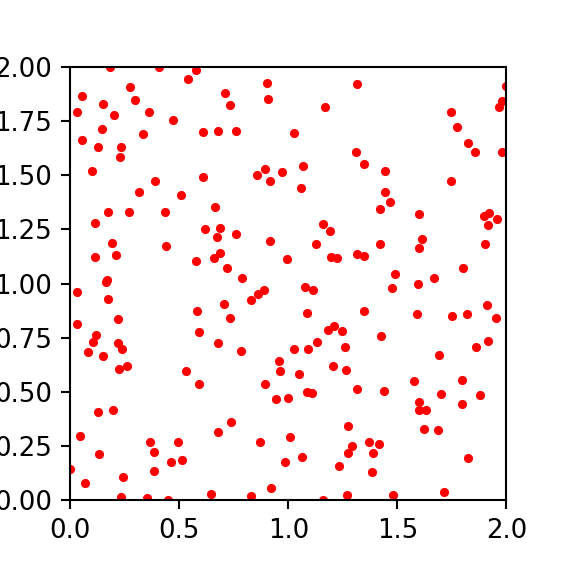

<IPython.core.display.Javascript object>


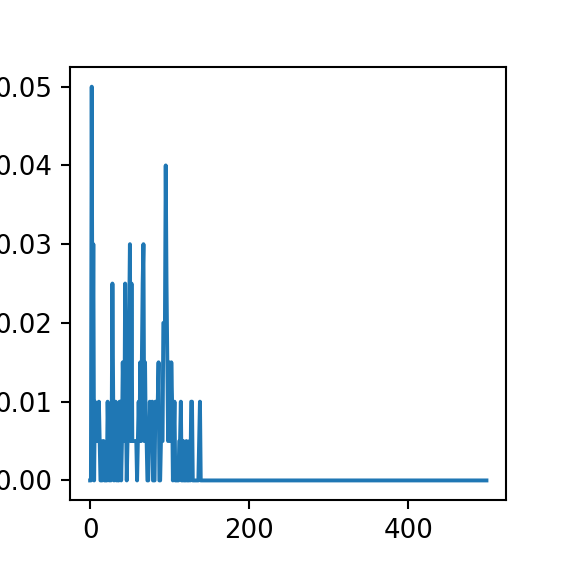

In [17]:
c = Const()
c.speed = 0.02
curve = model(c, show_dotses=True, n_trials=1);
plt.figure(figsize=(3,3))
plt.plot(np.diff(curve))